# ***Uemployment rate analysis*** #

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('unemployment analysis.csv')

In [3]:
df.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [4]:
df.isna().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

From above output we can see no empty or null value is there

In [5]:
# df['avg_unemplyement'] = df.loc[:, '1991':'2021'].mean(axis='columns').round(2)

In [6]:
# df.head(2)

# **1. Overall Trends and Patterns**

In [7]:
df.loc[df['2021'].idxmax(), ['Country Name', '2021']]

Country Name    South Africa
2021                   33.56
Name: 232, dtype: object

In [8]:
df['2021'].max()

np.float64(33.56)

In [9]:
df.set_index('Country Code',inplace=True)

**Q1. How has the unemployment rate changed globally over time?**

In [10]:
numeric_cols =  df.select_dtypes('number')

In [11]:
numeric_cols.mean()

1991    7.278000
1992    7.626340
1993    8.070766
1994    8.246043
1995    8.333915
1996    8.494894
1997    8.394043
1998    8.441064
1999    8.568043
2000    8.438979
2001    8.422213
2002    8.593277
2003    8.550723
2004    8.341702
2005    8.121872
2006    7.710511
2007    7.330340
2008    7.204170
2009    7.944426
2010    8.105149
2011    8.041830
2012    8.062553
2013    8.086468
2014    7.924340
2015    7.818426
2016    7.720979
2017    7.485404
2018    7.247404
2019    7.087362
2020    8.278809
2021    8.219660
dtype: float64

**Q2. Are there any noticeable patterns in unemployment rates across decades?**

In [12]:
result = pd.DataFrame({'country_name': df['Country Name'],
                      'Max_Year': numeric_cols.idxmax(axis='columns'),
                      'Max_unemployment_rating': numeric_cols.max(axis='columns'),
                      'Min_Year': numeric_cols.idxmin(axis='columns'),
                      'Min_unemployment_rating': numeric_cols.min(axis='columns')
                      })

result

,country_name,Max_Year,Max_unemployment_rating,Min_Year,Min_unemployment_rating
Country Code,,,,,
AFE,Africa Eastern and Southern,2021,8.11,2008,6.27
AFG,Afghanistan,2021,13.28,1991,10.65
AFW,Africa Western and Central,2021,6.84,2013,4.41
AGO,Angola,2010,9.43,2009,3.78
ALB,Albania,1992,30.01,1991,10.31
...,...,...,...,...,...
WSM,Samoa,2021,9.84,1991,2.10
YEM,"Yemen, Rep.",2015,13.77,1992,8.31
ZAF,South Africa,2021,33.56,2008,22.41


In [13]:
result.groupby('Max_Year').count()['country_name'].sort_values(ascending=False)

Max_Year
2021    63
2020    29
1993    13
2010    10
2003     9
1999     9
2002     9
2013     9
2000     9
1997     8
1995     8
1998     7
2005     6
1991     5
1992     5
1996     5
2014     4
1994     4
2009     4
2007     4
2001     3
2006     3
2011     3
2012     2
2016     1
2015     1
2019     1
2017     1
Name: country_name, dtype: int64

From Above Insight we can see, In the year of 2021 most countries has highest unemployment rate from this we can conclude that after COVID unemployment rate spiked in most countries.

**Q3. Which years had the highest and lowest global unemployment rates?**

In [14]:
global_avg_uneployment = numeric_cols.mean()
global_avg_uneployment

1991    7.278000
1992    7.626340
1993    8.070766
1994    8.246043
1995    8.333915
1996    8.494894
1997    8.394043
1998    8.441064
1999    8.568043
2000    8.438979
2001    8.422213
2002    8.593277
2003    8.550723
2004    8.341702
2005    8.121872
2006    7.710511
2007    7.330340
2008    7.204170
2009    7.944426
2010    8.105149
2011    8.041830
2012    8.062553
2013    8.086468
2014    7.924340
2015    7.818426
2016    7.720979
2017    7.485404
2018    7.247404
2019    7.087362
2020    8.278809
2021    8.219660
dtype: float64

In [15]:
max_ = global_avg_uneployment.idxmax()
min_ = global_avg_uneployment.idxmin()

In [16]:
print(f"Highest average global unemployment is on the year {max_} and Lowest average global unemployment is on the year {min_}.")

Highest average global unemployment is on the year 2002 and Lowest average global unemployment is on the year 2019.


# **2. Country-Level Insights**

**Q1. Which country had the highest and lowest unemployment rates in a given year?**

In [17]:
result.set_index('country_name', inplace=True)

In [18]:
max_une_rate = result['Max_unemployment_rating'].max().item()
max_une_count =  result['Max_unemployment_rating'].idxmax()

In [19]:
min_une_rate = result['Max_unemployment_rating'].min().item()
min_une_count =  result['Max_unemployment_rating'].idxmin()

In [20]:
print("Unemployment is high in %s with unemployment rate %s" % (max_une_count, max_une_rate))
print("Unemployment is low in %s with unemployemnt rate %s" % (min_une_count, min_une_rate))

Unemployment is high in North Macedonia with unemployment rate 38.8
Unemployment is low in Qatar with unemployemnt rate 0.87


**Q2. How has the unemployment rate evolved in a specific country over time?**

<Axes: >

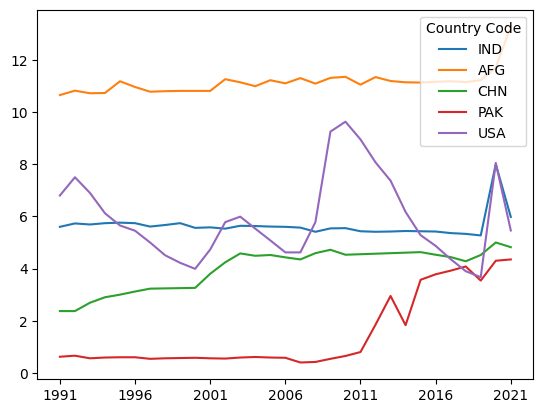

In [21]:
df.loc[['IND', 'AFG', 'CHN', 'PAK', 'USA'], '1991':'2021'].T.plot()

# **3. Yearly Comparisons**

**Q1. How does the unemployment rate in 2020 (COVID-19) compare to previous years?**

In [22]:
global_avg_uneployment['2018':'2021']

2018    7.247404
2019    7.087362
2020    8.278809
2021    8.219660
dtype: float64

In [23]:
increase_2020 = ((global_avg_uneployment['2020'] - global_avg_uneployment['2019']) / global_avg_uneployment['2019']) * 100
print(f"Global Unemployment Increase in 2020: {increase_2020:.2f}%")

Global Unemployment Increase in 2020: 16.81%


**Q2. Were there any global economic crises that led to sharp changes in unemployment?**

<Axes: title={'center': 'Global unemploymet trends (1991 - 2021)'}>

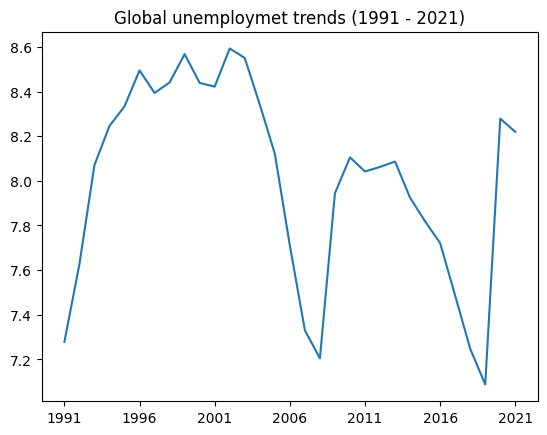

In [28]:
global_avg_uneployment.plot(title="Global unemploymet trends (1991 - 2021)")

# **4. Statistical Insights**

**Q1. What is the average, median, and standard deviation of unemployment rates per year?**

In [35]:
stats = pd.concat([numeric_cols.mean(), numeric_cols.median(), numeric_cols.std()],
                   axis='columns').rename(columns={0: "Average", 1:"Median", 2: "Standered_Deviation"})
stats

,Average,Median,Standered_Deviation
1991,7.278000,5.41,6.013749
1992,7.626340,5.71,6.296617
1993,8.070766,6.03,6.335855
1994,8.246043,6.55,6.243778
1995,8.333915,6.70,6.330822
1996,8.494894,7.05,6.358431
1997,8.394043,6.93,6.206845
1998,8.441064,6.89,6.133045
1999,8.568043,6.69,6.088361
2000,8.438979,6.53,6.126318


<Axes: title={'center': 'Statastic Trend of Unemployment'}>

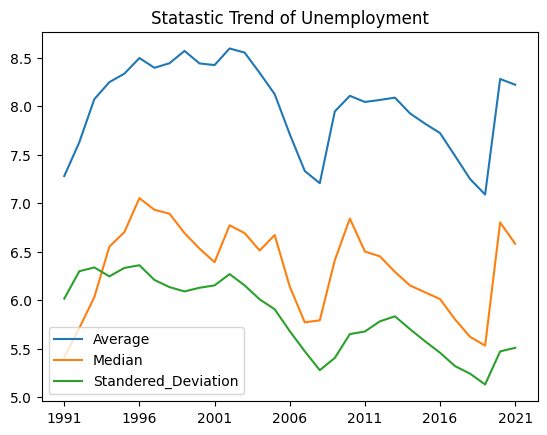

In [38]:
stats.plot(title="Statastic Trend of Unemployment")